# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
 # Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
import kfold
import numpy as np
import matplotlib.pyplot as plt

/home/dante/Documents/facu/metnum-tp2/notebooks
Python 3.8.3


## Explorando los datos

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [ ]:
df_train[:10]

### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [ ]:
df_train = df_train[:5000]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [ ]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

In [ ]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [ ]:
df_train["label"].value_counts(normalize=True)

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [ ]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)


In [ ]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


# Experimentacion con diferentes k y K

## Diferentes k

In [13]:
k_list = [x for x in range(2,14,2)]
K = 5
size = 1000

knn_accuracities_k = []
knn_Times_k = []
knn_Precision_k = []
knn_Recall_k = []
knn_F_Score_k = []

knn_Matrix_k = np.zeros((10,10))

for k in k_list:
    res =  kfold.tests_KFolds(k, K,False,0,"../data/train.csv",size)   
    knn_accuracities_k.append(res[0])    
    knn_Times_k.append(res[1])
    knn_Precision_k.append(res[2])
    knn_Recall_k.append(res[3])
    knn_F_Score_k.append(res[4])
    knn_Matrix_k=knn_Matrix_k+res[5]

knn_accuracities_k = np.asarray(knn_accuracities_k)
knn_Times_k = np.asarray(knn_Times_k)
knn_Precision_k=np.asarray(knn_Precision_k)
knn_Recall_k = np.asarray(knn_Recall_k)
knn_F_Score_k = np.asarray(knn_F_Score_k)

In [14]:
pca_accuracities_k = []
pca_Times_k = []
pca_Precision_k = []
pca_Recall_k = []
pca_F_Score_k = []

pca_Matrix_k = np.zeros((10,10))

for k in k_list:
    res =  kfold.tests_KFolds(k, K,True,18,"../data/train.csv",size)   
    pca_accuracities_k.append(res[0])    
    pca_Times_k.append(res[1])
    pca_Precision_k.append(res[2])
    pca_Recall_k.append(res[3])
    pca_F_Score_k.append(res[4])
    pca_Matrix_k=pca_Matrix_k+res[5]

pca_accuracities_k = np.asarray(pca_accuracities_k)
pca_Times_k = np.asarray(pca_Times_k)
pca_Precision_k = np.asarray(pca_Precision_k)
pca_Recall_k = np.asarray(pca_Recall_k)
pca_F_Score_k = np.asarray(pca_F_Score_k)

array([0.874, 0.859, 0.879, 0.86 , 0.875, 0.856])

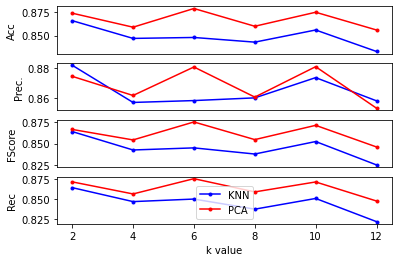

In [15]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

plt.subplot(4, 1, 1)
plt.plot(k_list,knn_accuracities_k, line_styles[0])
plt.plot(k_list,pca_accuracities_k, line_styles[1])
plt.ylabel("Acc")
plt.xticks([])

plt.subplot(4, 1, 2)
plt.plot(k_list,knn_Precision_k, line_styles[0])
plt.plot(k_list,pca_Precision_k, line_styles[1])
plt.ylabel("Prec.")
plt.xticks([])

plt.subplot(4, 1, 3)
plt.plot(k_list,knn_F_Score_k, line_styles[0])
plt.plot(k_list,pca_F_Score_k, line_styles[1])
plt.ylabel("FScore")
plt.xticks([])
    
plt.subplot(4, 1, 4)
plt.plot(k_list,knn_Recall_k, line_styles[0])
plt.plot(k_list,pca_Recall_k, line_styles[1])
plt.ylabel("Rec")
plt.xticks([])

    
plt.xlabel("k value")
plt.xticks(k_list)
# plt.axis([1, alphas[-1], 0.1, 1])
plt.gca().legend(['KNN','PCA'])
plt.savefig("expAcotados/k_exp_metrics.png")
pca_accuracities_k

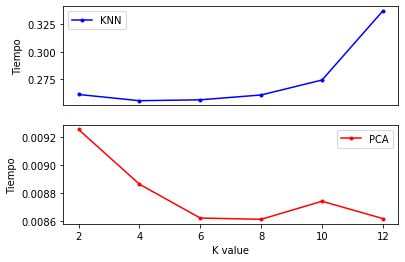

In [16]:
plt.subplot(2, 1, 1)
plt.plot(k_list,knn_Times_k, line_styles[0])
plt.gca().legend(['KNN'])
plt.ylabel("Tiempo")
plt.xticks([])

plt.subplot(2, 1, 2)
plt.plot(k_list,pca_Times_k, line_styles[1])
plt.ylabel("Tiempo")
plt.gca().legend(['PCA'])
plt.xticks([])

plt.xlabel("K value")
plt.xticks(k_list)
plt.savefig("expAcotados/k_exp_time.png")

[[571.   0.   1.   0.   1.   5.   9.   0.   0.   1.]
 [  0. 659.   1.   0.   2.   0.   0.   3.   0.   0.]
 [ 17.  75. 483.   4.   5.   0.   3.  10.   6.   5.]
 [  4.  28.  11. 512.   1.  23.   2.  11.   8.  13.]
 [  0.  20.   1.   1. 536.   1.   5.   8.   0.  59.]
 [  7.  20.   0.  54.  11. 427.  11.   4.   5.   9.]
 [ 15.  24.   0.   0.   4.   1. 555.   0.   1.   0.]
 [  1.  36.   2.   1.   9.   1.   0. 522.   0.  25.]
 [ 13.  47.   6.  38.  11.  20.  10.   5. 355.  19.]
 [  6.   9.   2.   7.  71.   2.   0.  56.   0. 473.]]


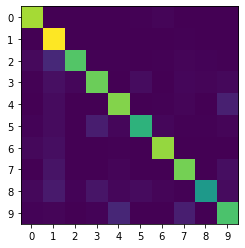

In [17]:
print(knn_Matrix_k)
plt.imshow(knn_Matrix_k)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10));
plt.savefig("expAcotados/k_exp_matrix.png")

## Diferentes K

In [18]:
K_list = [x for x in range(2,25)]
k = 6
size = 1000

knn_accuracities_K = []
knn_Times_K = []
knn_Precision_K = []
knn_Recall_K = []
knn_F_Score_K = []

knn_Matrix_K = np.zeros((10,10))

for k in K_list:
    res =  kfold.tests_KFolds(k, K,False,8,"../data/train.csv",size)   
    knn_accuracities_K.append(res[0])    
    knn_Times_K.append(res[1])
    knn_Precision_K.append(res[2])
    knn_Recall_K.append(res[3])
    knn_F_Score_K.append(res[4])
    knn_Matrix_K=knn_Matrix_K+res[5]

knn_accuracities_K = np.asarray(knn_accuracities_K)
knn_Times_K = np.asarray(knn_Times_K)
knn_Precision_K=np.asarray(knn_Precision_K)
knn_Recall_K = np.asarray(knn_Recall_K)
knn_F_Score_K = np.asarray(knn_F_Score_K)

In [19]:
pca_accuracities_K = []
pca_Times_K = []
pca_Precision_K = []
pca_Recall_K = []
pca_F_Score_K = []

pca_Matrix_K = np.zeros((10,10))

for k in K_list:
    res =  kfold.tests_KFolds(k, K,True,18,"../data/train.csv",size)   
    pca_accuracities_K.append(res[0])    
    pca_Times_K.append(res[1])
    pca_Precision_K.append(res[2])
    pca_Recall_K.append(res[3])
    pca_F_Score_K.append(res[4])
    pca_Matrix_K=pca_Matrix_K+res[5]

pca_accuracities_K = np.asarray(pca_accuracities_K)
pca_Times_K = np.asarray(pca_Times_K)
pca_Precision_K=np.asarray(pca_Precision_K)
pca_Recall_K = np.asarray(pca_Recall_K)
pca_F_Score_K = np.asarray(pca_F_Score_K)

array([0.856, 0.873, 0.852, 0.868, 0.858, 0.868, 0.855, 0.844, 0.824,
       0.854, 0.848, 0.845, 0.828, 0.826, 0.811, 0.804, 0.833, 0.826,
       0.799, 0.805, 0.79 , 0.783, 0.779])

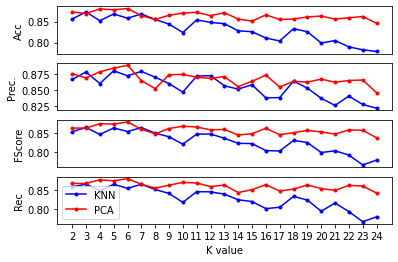

In [20]:
plt.subplot(4, 1, 1)
plt.plot(K_list,knn_accuracities_K, line_styles[0])
plt.plot(K_list,pca_accuracities_K, line_styles[1])
plt.ylabel("Acc")
plt.xticks([])

plt.subplot(4, 1, 2)
plt.plot(K_list,knn_Precision_K, line_styles[0])
plt.plot(K_list,pca_Precision_K, line_styles[1])
plt.ylabel("Prec.")
plt.xticks([])

plt.subplot(4, 1, 3)
plt.plot(K_list,knn_F_Score_K, line_styles[0])
plt.plot(K_list,pca_F_Score_K, line_styles[1])
plt.ylabel("FScore")
plt.xticks([])
    
plt.subplot(4, 1, 4)
plt.plot(K_list,knn_Recall_K, line_styles[0])
plt.plot(K_list,pca_Recall_K, line_styles[1])
plt.ylabel("Rec")
plt.xticks([])

    
plt.xlabel("K value")
plt.xticks(K_list)
# plt.axis([1, alphas[-1], 0.1, 1])
plt.gca().legend(['KNN','PCA'])
plt.savefig("expAcotados/K_exp_metrics.png")
knn_accuracities_K

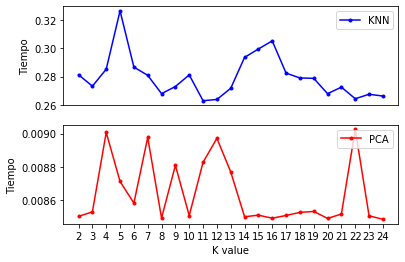

In [21]:
plt.subplot(2, 1, 1)
plt.plot(K_list,knn_Times_K, line_styles[0])
plt.gca().legend(['KNN'])
plt.ylabel("Tiempo")
plt.xticks([])

plt.subplot(2, 1, 2)
plt.plot(K_list,pca_Times_K, line_styles[1])
plt.ylabel("Tiempo")
plt.gca().legend(['PCA'])
plt.xticks([])

plt.xlabel("K value")
plt.xticks(K_list)
plt.savefig("expAcotados/K_exp_time.png")

[[2.126e+03 1.100e+01 2.000e+00 3.000e+00 3.000e+00 2.800e+01 4.600e+01
  7.000e+00 3.000e+00 2.000e+00]
 [0.000e+00 2.626e+03 4.000e+00 2.000e+00 2.000e+00 0.000e+00 0.000e+00
  3.000e+00 2.000e+00 2.000e+00]
 [6.400e+01 3.290e+02 1.620e+03 4.000e+01 3.000e+01 8.000e+00 3.400e+01
  8.200e+01 3.200e+01 1.600e+01]
 [1.700e+01 1.460e+02 2.000e+01 1.975e+03 2.000e+00 4.900e+01 1.800e+01
  3.500e+01 5.500e+01 5.500e+01]
 [1.000e+00 1.230e+02 3.000e+00 0.000e+00 1.731e+03 2.000e+00 3.800e+01
  1.700e+01 0.000e+00 3.140e+02]
 [3.300e+01 1.330e+02 0.000e+00 2.430e+02 2.500e+01 1.478e+03 4.800e+01
  1.600e+01 1.700e+01 6.300e+01]
 [5.200e+01 1.050e+02 1.000e+00 2.000e+00 1.800e+01 1.900e+01 2.082e+03
  3.000e+00 3.000e+00 0.000e+00]
 [3.000e+00 1.670e+02 6.000e+00 1.000e+00 2.700e+01 1.000e+00 0.000e+00
  2.125e+03 1.000e+00 1.070e+02]
 [3.500e+01 2.410e+02 1.000e+01 1.480e+02 3.200e+01 7.700e+01 2.200e+01
  2.700e+01 1.529e+03 1.060e+02]
 [1.500e+01 5.900e+01 7.000e+00 3.100e+01 1.450e+02 4.0

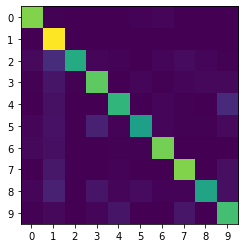

In [22]:
print(knn_Matrix_K)
plt.imshow(knn_Matrix_K)
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10));
plt.savefig("expAcotados/K_exp_matrix.png")

# Experimentacion con diferente alpha

In [5]:
k = 4
K = 5
alpha_list = [x for x in range(2,40,2)]
size = 8000

knn_accuracities_alpha = []
knn_Times_alpha = []
knn_Precision_alpha = []
knn_Recall_alpha = []
knn_F_Score_alpha = []

knn_Matrix_alpha = np.zeros((10,10))
res =  kfold.tests_KFolds(k, K,False,2,"../data/train.csv",size)
knn_Matrix_alpha=res[5]
for alpha in alpha_list:   
    knn_accuracities_alpha.append(res[0])    
    knn_Times_alpha.append(res[1])
    knn_Precision_alpha.append(res[2])
    knn_Recall_alpha.append(res[3])
    knn_F_Score_alpha.append(res[4])

knn_accuracities_alpha = np.asarray(knn_accuracities_alpha)
knn_Times_alpha = np.asarray(knn_Times_alpha)
knn_Precision_alpha=np.asarray(knn_Precision_alpha)
knn_Recall_alpha = np.asarray(knn_Recall_alpha)
knn_F_Score_alpha = np.asarray(knn_F_Score_alpha)

In [6]:
k = 4
K = 5
alpha_list = [x for x in range(2,40,2)]
size = 8000

pca_accuracities_alpha = []
pca_Times_alpha = []
pca_Precision_alpha = []
pca_Recall_alpha = []
pca_F_Score_alpha = []

pca_Matrix_alpha = np.zeros((10,10))

for alpha in alpha_list:
    res =  kfold.tests_KFolds(k, K,True,alpha,"../data/train.csv",size)   
    pca_accuracities_alpha.append(res[0])    
    pca_Times_alpha.append(res[1])
    pca_Precision_alpha.append(res[2])
    pca_Recall_alpha.append(res[3])
    pca_F_Score_alpha.append(res[4])
    pca_Matrix_alpha=pca_Matrix_alpha+res[5]

pca_accuracities_alpha = np.asarray(pca_accuracities_alpha)
pca_Times_alpha = np.asarray(pca_Times_alpha)
pca_Precision_alpha=np.asarray(pca_Precision_alpha)
pca_Recall_alpha = np.asarray(pca_Recall_alpha)
pca_F_Score_alpha = np.asarray(pca_F_Score_alpha)

(array([0.93575, 0.93575, 0.93575, 0.93575, 0.93575, 0.93575, 0.93575,
        0.93575, 0.93575, 0.93575, 0.93575, 0.93575, 0.93575, 0.93575,
        0.93575, 0.93575, 0.93575, 0.93575, 0.93575]),
 array([0.412125, 0.61    , 0.796375, 0.869375, 0.89125 , 0.91675 ,
        0.926625, 0.940625, 0.936625, 0.94575 , 0.944375, 0.946   ,
        0.9475  , 0.947   , 0.951875, 0.95    , 0.953125, 0.951375,
        0.948625]))

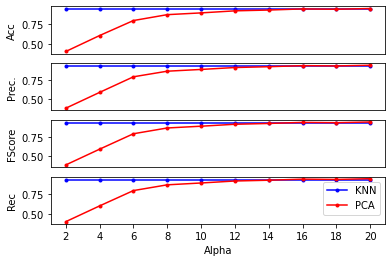

In [41]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

plt.subplot(4, 1, 1)
plt.plot(alpha_list[:10],knn_accuracities_alpha[:10], line_styles[0])
plt.plot(alpha_list[:10],pca_accuracities_alpha[:10], line_styles[1])
plt.ylabel("Acc")
plt.xticks([])

plt.subplot(4, 1, 2)
plt.plot(alpha_list[:10],knn_Precision_alpha[:10], line_styles[0])
plt.plot(alpha_list[:10],pca_Precision_alpha[:10], line_styles[1])
plt.ylabel("Prec.")
plt.xticks([])

plt.subplot(4, 1, 3)
plt.plot(alpha_list[:10],knn_F_Score_alpha[:10], line_styles[0])
plt.plot(alpha_list[:10],pca_F_Score_alpha[:10], line_styles[1])
plt.ylabel("FScore")
plt.xticks([])
    
plt.subplot(4, 1, 4)
plt.plot(alpha_list[:10],knn_Recall_alpha[:10], line_styles[0])
plt.plot(alpha_list[:10],pca_Recall_alpha[:10], line_styles[1])
plt.ylabel("Rec")
plt.xticks([])

    
plt.xlabel("Alpha")
plt.xticks(alpha_list[:10])
plt.gca().legend(['KNN','PCA'])
plt.savefig("expAcotados/alpha_exp_metrics.png")
knn_accuracities_alpha,pca_accuracities_alpha

In [ ]:
plt.figure("tiempos alpha")
plt.plot(alpha_list, pca_Times_alpha)
plt.grid()
plt.xlabel(r"alpha")
plt.ylabel("Tiempos")
plt.savefig("expAcotados/alpha_exp_times.png")
plt.show()

# Experimentacion con diferentes tamaños

In [33]:
k = 6
K = 5
alpha = 18

size_list = [100,500,1000,3000,5000,8000]

knn_accuracities_size = []
knn_Times_size = []
knn_Precision_size = []
knn_Recall_size = []
knn_F_Score_size = []

knn_Matrix_size = np.zeros((10,10))

for size in size_list:
    print(size)
    res =  kfold.tests_KFolds(k, K,False,alpha,"../data/train.csv",size)   
    knn_accuracities_size.append(res[0])    
    knn_Times_size.append(res[1])
    knn_Precision_size.append(res[2])
    knn_Recall_size.append(res[3])
    knn_F_Score_size.append(res[4])
    knn_Matrix_size=knn_Matrix_size+res[5]

knn_accuracities_size = np.asarray(knn_accuracities_size)
knn_Times_size = np.asarray(knn_Times_size)
knn_Precision_size=np.asarray(knn_Precision_size)
knn_Recall_size = np.asarray(knn_Recall_size)
knn_F_Score_size = np.asarray(knn_F_Score_size)

100


/home/dante/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dante/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


500
1000
3000
5000
8000


In [34]:
pca_accuracities_size = []
pca_Times_size = []
pca_Precision_size = []
pca_Recall_size = []
pca_F_Score_size = []

pca_Matrix_size = np.zeros((10,10))

for size in size_list:
    res =  kfold.tests_KFolds(k, K,True,alpha,"../data/train.csv",size)   
    pca_accuracities_size.append(res[0])    
    pca_Times_size.append(res[1])
    pca_Precision_size.append(res[2])
    pca_Recall_size.append(res[3])
    pca_F_Score_size.append(res[4])
    pca_Matrix_size=knn_Matrix_size+res[5]

pca_accuracities_size = np.asarray(pca_accuracities_size)
pca_Times_size = np.asarray(pca_Times_size)
pca_Precision_size=np.asarray(pca_Precision_size)
pca_Recall_size = np.asarray(pca_Recall_size)
pca_F_Score_size = np.asarray(pca_F_Score_size)

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

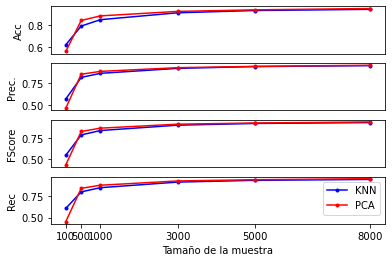

In [35]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']

plt.subplot(4, 1, 1)
plt.plot(size_list,knn_accuracities_size, line_styles[0])
plt.plot(size_list,pca_accuracities_size, line_styles[1])
plt.ylabel("Acc")
plt.xticks([])

plt.subplot(4, 1, 2)
plt.plot(size_list,knn_Precision_size, line_styles[0])
plt.plot(size_list,pca_Precision_size, line_styles[1])
plt.ylabel("Prec.")
plt.xticks([])

plt.subplot(4, 1, 3)
plt.plot(size_list,knn_F_Score_size, line_styles[0])
plt.plot(size_list,pca_F_Score_size, line_styles[1])
plt.ylabel("FScore")
plt.xticks([])
    
plt.subplot(4, 1, 4)
plt.plot(size_list,knn_Recall_size, line_styles[0])
plt.plot(size_list,pca_Recall_size, line_styles[1])
plt.ylabel("Rec")
plt.xticks([])

    
plt.xlabel("Tamaño de la muestra")
plt.xticks(size_list)
# plt.axis([1, alphas[-1], 0.1, 1])
plt.gca().legend(['KNN','PCA'])
plt.savefig("expAcotados/size_exp_metrics.png")
knn_accuracities_alpha<pca_accuracities_alpha

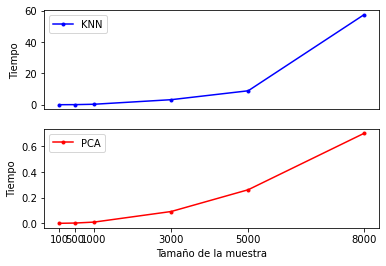

In [36]:
plt.subplot(2, 1, 1)
plt.plot(size_list,knn_Times_size, line_styles[0])
plt.gca().legend(['KNN'])
plt.ylabel("Tiempo")
plt.xticks([])

plt.subplot(2, 1, 2)
plt.plot(size_list,pca_Times_size, line_styles[1])
plt.ylabel("Tiempo")
plt.gca().legend(['PCA'])
plt.xticks([])

plt.xlabel("Tamaño de la muestra")
plt.xticks(size_list)
plt.savefig("expAcotados/size_exp_time.png")

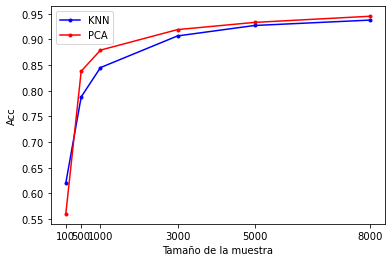

In [48]:
plt.plot(size_list,knn_accuracities_size, line_styles[0])
plt.plot(size_list,pca_accuracities_size, line_styles[1])
plt.ylabel("Acc")
plt.xlabel("Tamaño de la muestra")
plt.gca().legend(['KNN','PCA'])
plt.xticks(size_list)
plt.savefig("expAcotados/size_exp_acc_only.png")

In [37]:
K = 5
alpha = 18

size_list = [100,500,1000,3000,5000,8000]
k_list = [6,15,25,50]

knn_accuracities_matrix = []
knn_Times_matrix = []
knn_Precision_matrix = []
knn_Recall_matrix = []
knn_F_Score_matrix = []

knn_Matrix_size_k = np.zeros((10,10))
for k in k_list:
    knn_accuracities_size_k = []
    knn_Times_size_k = []
    knn_Precision_size_k = []
    knn_Recall_size_k = []
    knn_F_Score_size_k = []
    for size in size_list:
        print(size)
        res =  kfold.tests_KFolds(k, K,False,alpha,"../data/train.csv",size)   
        knn_accuracities_size_k.append(res[0])    
        knn_Times_size_k.append(res[1])
        knn_Precision_size_k.append(res[2])
        knn_Recall_size_k.append(res[3])
        knn_F_Score_size_k.append(res[4])
        knn_Matrix_size_k=knn_Matrix_size+res[5]
    knn_accuracities_size_k = np.asarray(knn_accuracities_size_k)
    knn_Times_size_k = np.asarray(knn_Times_size_k)
    knn_Precision_size_k=np.asarray(knn_Precision_size_k)
    knn_Recall_size_k = np.asarray(knn_Recall_size_k)
    knn_F_Score_size_k = np.asarray(knn_F_Score_size_k)
    knn_accuracities_matrix.append(knn_accuracities_size_k)    
    knn_Times_matrix.append(knn_Times_size_k)
    knn_Precision_matrix.append(knn_Precision_size_k)
    knn_Recall_matrix.append(knn_Recall_size_k)
    knn_F_Score_matrix.append(knn_F_Score_size_k)

100


/home/dante/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dante/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


500
1000
3000
5000
8000
100
500
1000
3000
5000
8000
100
500
1000
3000
5000
8000
100
500
1000
3000
5000
8000


In [39]:
K = 5
alpha = 18

size_list = [100,500,1000,3000,5000,8000]
k_list = [6,15,25,50]

pca_accuracities_matrix = []
pca_Times_matrix = []
pca_Precision_matrix = []
pca_Recall_matrix = []
pca_F_Score_matrix = []

pca_Matrix_size_k = np.zeros((10,10))
for k in k_list:
    pca_accuracities_size_k = []
    pca_Times_size_k = []
    pca_Precision_size_k = []
    pca_Recall_size_k = []
    pca_F_Score_size_k = []
    for size in size_list:
        print(size)
        res =  kfold.tests_KFolds(k, K,True,alpha,"../data/train.csv",size)   
        pca_accuracities_size_k.append(res[0])    
        pca_Times_size_k.append(res[1])
        pca_Precision_size_k.append(res[2])
        pca_Recall_size_k.append(res[3])
        pca_F_Score_size_k.append(res[4])
        pca_Matrix_size_k=pca_Matrix_size+res[5]
    pca_accuracities_size_k = np.asarray(pca_accuracities_size_k)
    pca_Times_size_k = np.asarray(pca_Times_size_k)
    pca_Precision_size_k=np.asarray(pca_Precision_size_k)
    pca_Recall_size_k = np.asarray(pca_Recall_size_k)
    pca_F_Score_size_k = np.asarray(pca_F_Score_size_k)
    pca_accuracities_matrix.append(pca_accuracities_size_k)    
    pca_Times_matrix.append(pca_Times_size_k)
    pca_Precision_matrix.append(pca_Precision_size_k)
    pca_Recall_matrix.append(pca_Recall_size_k)
    pca_F_Score_matrix.append(knn_F_Score_size_k)

100
500
1000
3000
5000
8000
100
500
1000
3000
5000
8000
100
500
1000
3000
5000
8000
100
500
1000
3000
5000
8000


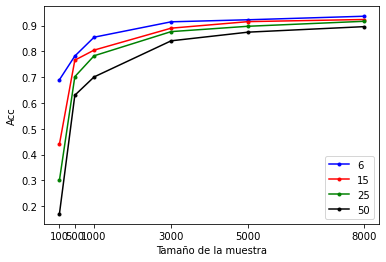

In [49]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']
for i in range(len(k_list)):
    plt.plot(size_list,knn_accuracities_matrix[i], line_styles[i])
plt.gca().legend([str(x) for x in k_list])
plt.ylabel("Acc")
plt.xlabel("Tamaño de la muestra")
plt.xticks(size_list)
plt.savefig("expAcotados/knn_k_by_size_acc.png")

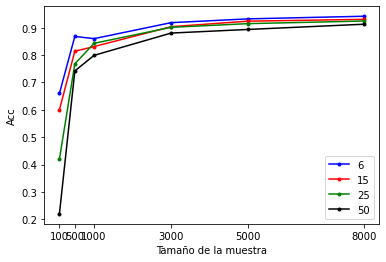

In [50]:
for i in range(len(k_list)):
    plt.plot(size_list,pca_accuracities_matrix[i], line_styles[i])
plt.gca().legend([str(x) for x in k_list])
plt.ylabel("Acc")
plt.xlabel("Tamaño de la muestra")
plt.xticks(size_list)
plt.savefig("expAcotados/pca_k_by_size_acc.png")

([<matplotlib.axis.XTick at 0x7fb077b27400>,
 <a list of 6 Text major ticklabel objects>)

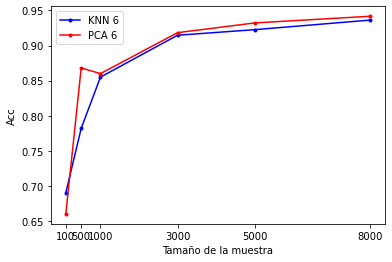

In [47]:
plt.plot(size_list,knn_accuracities_matrix[0], line_styles[0])
plt.plot(size_list,pca_accuracities_matrix[0], line_styles[1])
plt.gca().legend(['KNN 6','PCA 6'])
plt.ylabel("Acc")
plt.xlabel("Tamaño de la muestra")
plt.xticks(size_list)

# Finalmente, corremos la version completa con todos los datos seleccionados previamente

In [2]:
%%time
k = 4
K = 5
alpha = 18

knn_Matrix_size = np.zeros((10,10))

res =  kfold.tests_KFolds(k, K,True,alpha,"../data/train.csv")
print("Accuracy: {}".format(res[0]))
print("Precision: {}".format(res[2]))
print("Recall: {}".format(res[3]))
print("F-Score: {}".format(res[4]))
knn_Matrix_size=res[5]

Accuracy: 0.9628571428571429
Precision: 0.9626419479131695
Recall: 0.9625381153314039
F-Score: 0.9625299295768864
CPU times: user 2min 23s, sys: 636 ms, total: 2min 23s
Wall time: 2min 23s


In [3]:
%%time
k = 4
K = 5
alpha = 18

knn_Matrix_size = np.zeros((10,10))

res =  kfold.tests_KFolds(k, K,False,alpha,"../data/train.csv")
print("Accuracy: {}".format(res[0]))
print("Precision: {}".format(res[2]))
print("Recall: {}".format(res[3]))
print("F-Score: {}".format(res[4]))
knn_Matrix_size=res[5]

Accuracy: 0.9649047619047618
Precision: 0.9655764321346788
Recall: 0.9643361435364487
F-Score: 0.9646930151299573
CPU times: user 57min 30s, sys: 1h 3min 23s, total: 2h 53s
Wall time: 2h 28s


In [4]:
%%time
k = 4
K = 5
alpha = 30

knn_Matrix_size = np.zeros((10,10))

res =  kfold.tests_KFolds(k, K,True,alpha,"../data/train.csv")
print("Accuracy: {}".format(res[0]))
print("Precision: {}".format(res[2]))
print("Recall: {}".format(res[3]))
print("F-Score: {}".format(res[4]))
knn_Matrix_size=res[5]

Accuracy: 0.972547619047619
Precision: 0.9725522856057719
Recall: 0.9723032213753571
F-Score: 0.9723660543977217
CPU times: user 3min 26s, sys: 651 ms, total: 3min 26s
Wall time: 3min 26s
